In [55]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import os

In [56]:
hapiness_data = pd.read_csv('Resources/happiness_ranking2015.csv')
total_exp_data = pd.read_csv("C:/Users/yongs/Downloads/Happiness_Education/Resources/total_govt_exp1.csv")
literacy_data = pd.read_csv("Resources/total_literacy.csv", encoding = 'cp1252')
tertiary_data = pd.read_csv("C:/Users/yongs/Downloads/Happiness_Education/Resources/tertiary11.csv")


In [57]:
total_exp_data.head()

,Country,Country Code,Indicator Name,Indicator Code,2014,2015,2016,2017,2018
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,19.61272,22.85499,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,14.46593,12.50900,16.21170,15.66138,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,11.31770,13.59696,7.52363,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,9.96160,10.17952,9.66894,18.95694,NaN


In [58]:
all_education1 = pd.merge(hapiness_data, total_exp_data, on='Country', how='left')
all_education1.info

<bound method DataFrame.info of      Unnamed: 0                   Country  Happiness Score  Happiness Rank  \
0             0               Switzerland            7.587               1   
1             1                   Iceland            7.561               2   
2             2                   Denmark            7.527               3   
3             3                    Norway            7.522               4   
4             4                    Canada            7.427               5   
5             5                   Finland            7.406               6   
6             6               Netherlands            7.378               7   
7             7                    Sweden            7.364               8   
8             8               New Zealand            7.286               9   
9             9                 Australia            7.284              10   
10           10                    Israel            7.278              11   
11           11                C

In [59]:
all_education1 = all_education1.loc[:,['Country', 'Happiness Score', 'Happiness Rank', '2015' ]]
all_education1.head()

,Country,Happiness Score,Happiness Rank,2015
0,Switzerland,7.587,1,15.52806
1,Iceland,7.561,2,18.15801
2,Denmark,7.527,3,NaN
3,Norway,7.522,4,15.72882
4,Canada,7.427,5,NaN


In [60]:
all_education1 = all_education1.dropna()

In [61]:

all_education1.head()

,Country,Happiness Score,Happiness Rank,2015
0,Switzerland,7.587,1,15.52806
1,Iceland,7.561,2,18.15801
3,Norway,7.522,4,15.72882
5,Finland,7.406,6,12.45831
6,Netherlands,7.378,7,12.03053


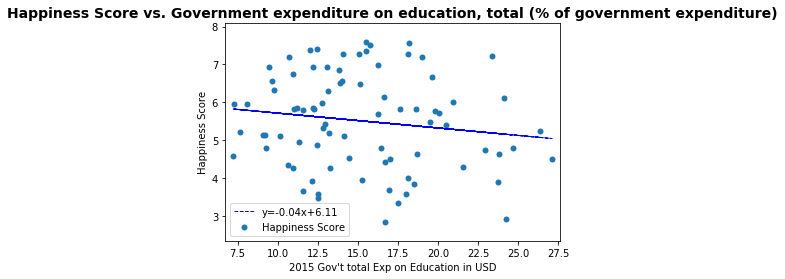

In [101]:
#all_education1 = all_education1.dropna()

total_exp = all_education1["2015"]
x_axis = total_exp

(slope_total_exp, intercept_total_exp, r_total_exp , p_total_exp, se_total_exp) = linregress(x_axis,all_education1["Happiness Score"] )
fit_total_exp= slope_total_exp * x_axis + intercept_total_exp

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Government expenditure on education, total (% of government expenditure)", fontsize=14, fontweight="bold")

plt.xlim(min(all_education1["2015"]-0.5),max(all_education1["2015"])+0.5)
      
plt.ylim(min(all_education1["Happiness Score"]-0.5),max(all_education1["Happiness Score"])+0.5)
plt.scatter(x_axis,all_education1["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_total_exp,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_total_exp,intercept_total_exp))

plt.ylabel("Happiness Score")
plt.xlabel("2015 Gov't total Exp on Education in USD")
plt.legend()





In [64]:
all_literacy = pd.merge(hapiness_data, literacy_data, on='Country', how='left')
all_literacy.head()

,Unnamed: 0,Country,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Short Name,Country Code_x,Country Code_y,Indicator Name,Indicator Code,2015
0,0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CH,CHE,CHE,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
1,1,Iceland,7.561,2,0.94784,64.963051,-19.020835,IS,ISL,ISL,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
2,2,Denmark,7.527,3,0.87464,56.263920,9.501785,DK,DNK,DNK,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
3,3,Norway,7.522,4,0.88521,60.472024,8.468946,NO,NOR,NOR,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
4,4,Canada,7.427,5,0.90563,56.130366,-106.346771,CA,CAN,CAN,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN


In [65]:
all_literacy.rename(columns = {"2015":"2015 total literacy"}, inplace = True)

all_literacy.head()

,Unnamed: 0,Country,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Short Name,Country Code_x,Country Code_y,Indicator Name,Indicator Code,2015 total literacy
0,0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CH,CHE,CHE,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
1,1,Iceland,7.561,2,0.94784,64.963051,-19.020835,IS,ISL,ISL,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
2,2,Denmark,7.527,3,0.87464,56.263920,9.501785,DK,DNK,DNK,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
3,3,Norway,7.522,4,0.88521,60.472024,8.468946,NO,NOR,NOR,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN
4,4,Canada,7.427,5,0.90563,56.130366,-106.346771,CA,CAN,CAN,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN


In [66]:
all_literacy = all_literacy.loc[:,['Country', 'Happiness Score', 'Happiness Rank', '2015 total literacy' ]]
all_literacy.head()

,Country,Happiness Score,Happiness Rank,2015 total literacy
0,Switzerland,7.587,1,NaN
1,Iceland,7.561,2,NaN
2,Denmark,7.527,3,NaN
3,Norway,7.522,4,NaN
4,Canada,7.427,5,NaN


In [67]:
all_literacy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 4 columns):
Country                158 non-null object
Happiness Score        158 non-null float64
Happiness Rank         158 non-null int64
2015 total literacy    32 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ KB


In [68]:
all_tertiary = pd.merge(hapiness_data, tertiary_data, on='Country', how='left')
all_tertiary.head()

,Unnamed: 0,Country,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Short Name,Country Code_x,Country Code_y,Indicator Name,Indicator Code,2014,2015
0,0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CH,CHE,CHE,"School enrollment, tertiary (% gross)",SE.TER.ENRR,57.03425,57.51696
1,1,Iceland,7.561,2,0.94784,64.963051,-19.020835,IS,ISL,ISL,"School enrollment, tertiary (% gross)",SE.TER.ENRR,81.44465,75.76606
2,2,Denmark,7.527,3,0.87464,56.263920,9.501785,DK,DNK,DNK,"School enrollment, tertiary (% gross)",SE.TER.ENRR,81.03409,82.13379
3,3,Norway,7.522,4,0.88521,60.472024,8.468946,NO,NOR,NOR,"School enrollment, tertiary (% gross)",SE.TER.ENRR,77.54669,77.95804
4,4,Canada,7.427,5,0.90563,56.130366,-106.346771,CA,CAN,CAN,"School enrollment, tertiary (% gross)",SE.TER.ENRR,66.00291,65.28307


In [69]:
#all_tertiary.rename(columns = {"2015":"2015 tertiary(% gross)"}, inplace = True)

#all_tertiary.head()

In [100]:
all_tertiary = all_tertiary.loc[:,['Country', 'Happiness Score', 'Happiness Rank', '2015' ]]
all_tertiary.head()

,Country,Happiness Score,Happiness Rank,2015
0,Switzerland,7.587,1,57.51696
1,Iceland,7.561,2,75.76606
2,Denmark,7.527,3,82.13379
3,Norway,7.522,4,77.95804
4,Canada,7.427,5,65.28307


In [71]:
all_tertiairy = all_tertiary.dropna()

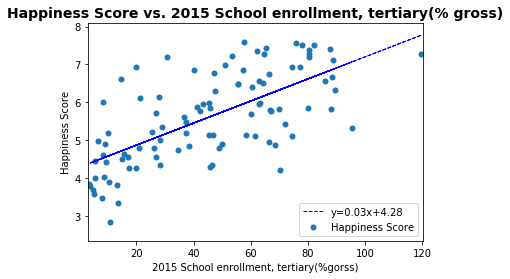

In [74]:
total_ter = all_tertiairy["2015"]
x_axis = total_ter

(slope_total_ter, intercept_total_ter, r_total_ter , p_total_ter, se_total_ter) = linregress(x_axis,all_tertiairy["Happiness Score"] )
fit_total_ter= slope_total_ter * x_axis + intercept_total_ter

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. 2015 School enrollment, tertiary(% gross)", fontsize=14, fontweight="bold")

plt.xlim(min(all_tertiairy["2015"]-0.5),max(all_tertiairy["2015"])+0.5)
      
plt.ylim(min(all_tertiairy["Happiness Score"]-0.5),max(all_tertiairy["Happiness Score"])+0.5)
plt.scatter(x_axis,all_tertiairy["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_total_ter,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_total_ter,intercept_total_ter))

plt.ylabel("Happiness Score")
plt.xlabel("2015 School enrollment, tertiary(%gorss)")
plt.legend()


In [99]:
stats_df=pd.DataFrame({'Factor':['Government expenditure on education, total(% of govt expenditure)'],
                       'R Value':[r_total_exp],
                       'P Value':[p_total_exp],
                       'Standard Error':[se_total_ter]})
stats_df

,Factor,R Value,P Value,Standard Error
0,"Government expenditure on education, total(% o...",-0.147771,0.185215,0.003279


In [80]:
print(r_total_ter , p_total_ter, se_total_ter)

0.6720993640220884 3.541793204209569e-14 0.0032792411234059964


In [81]:
print(r_total_exp , p_total_exp, se_total_exp)

-0.14777116073146312 0.18521478317865772 0.02938228653658785


In [79]:
all_education1.corr()

,Happiness Score,Happiness Rank,2015
Happiness Score,1.000000,-0.992296,-0.147771
Happiness Rank,-0.992296,1.000000,0.155994
2015,-0.147771,0.155994,1.000000


In [85]:
all_tertiary.to_csv('all_tertiary.csv')